In [3]:
#Importing Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import pickle,joblib
import numpy as np

In [4]:
def read_data(path):
    import pandas as pd
    return pd.read_csv(path)

In [5]:
data = read_data(
"https://raw.githubusercontent.com/harankumar16/Machine-Learning-Models/main/KNN%20Assignment/iphone_purchase_records.csv")

In [6]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
columns = data.columns
columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [8]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
data.duplicated().sum() ## No duplicated values and no null values

20

In [11]:
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(data.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column Gender
Female    204
Male      196
Name: Gender, dtype: int64
The unique values and their count in column Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64
The unique values and their count in column Salary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64
The unique values and their count in column Purchase Iphone
0    257
1    143
Name: Purchase Iphone, dtype: int64


In [22]:
data.iloc[::,0].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

## Exploratory data analysis

<Axes: >

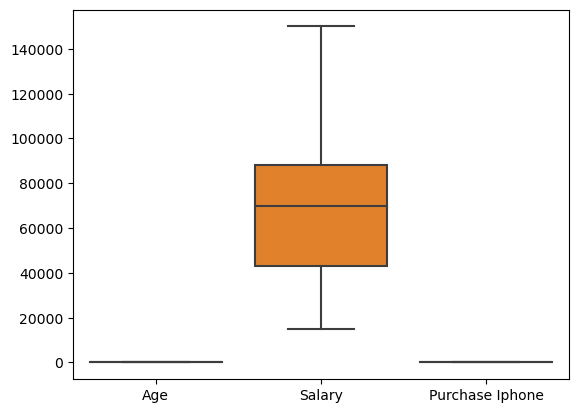

In [12]:
sns.boxplot(data)

In [13]:
columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [14]:
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(data.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column Gender
Female    204
Male      196
Name: Gender, dtype: int64
The unique values and their count in column Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64
The unique values and their count in column Salary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64
The unique values and their count in column Purchase Iphone
0    257
1    143
Name: Purchase Iphone, dtype: int64


## Modeling

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
data = data.apply(lambda lb: d[lb.name].fit_transform(lb))

In [31]:
x=data.iloc[::,0:3]
y = data.iloc[::,3]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [32]:
def train_test(x,y,test_size):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=1234)
    for i in x_train,x_test,y_train,y_test:
        print(i.shape)
    return x_train,x_test,y_train,y_test
print("Train and test data is being splitted...")
x_train,x_test,y_train,y_test=train_test(x,y,0.2)


Train and test data is being splitted...
(320, 3)
(80, 3)
(320,)
(80,)


In [35]:
m.sqrt(len(data))

20.0

In [43]:
model = KNeighborsClassifier(n_neighbors=20)
model_train = model.fit(x_train,y_train)
print("Model training is completed")
pred = model_train.predict(x_test)

Model training is completed


In [44]:
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [45]:
accuracy_score(y_test,pred)

0.825

In [46]:
con=confusion_matrix(y_test,pred)
con

array([[47,  6],
       [ 8, 19]], dtype=int64)

In [54]:
model_train.classes_

array([0, 1], dtype=int64)

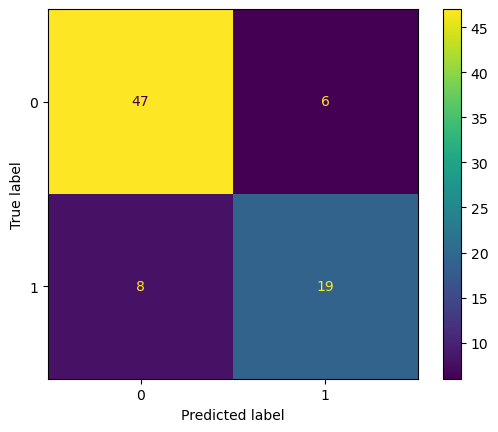

In [56]:
ConfusionMatrixDisplay(con,display_labels=model_train.classes_,).plot()

In [47]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.1
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ fil